In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, recall_score, precision_score, roc_curve, precision_recall_curve, auc, average_precision_score, roc_auc_score


In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv("creditcard.csv")

xs = df.drop("Class", axis=1)
ys = df["Class"]

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df = pd.read_csv("creditcard.csv")

xs = df.drop("Class", axis=1)
ys = df["Class"]

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.groupby('Class').count()['Amount']

Class
0    284315
1       492
Name: Amount, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=400, n_jobs=8)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy_t = accuracy_score(y_train, y_pred)
recall_t = recall_score(y_train, y_pred)
precision_t = precision_score(y_train, y_pred)

y_pred = model.predict(X_test)

accuracy_v = accuracy_score(y_test, y_pred)
recall_v = recall_score(y_test, y_pred)
precision_v = precision_score(y_test, y_pred)


print(f"accuracy (train): {accuracy_t:.2f}")
print(f"Recall (train): {recall_t:.2f}")
print(f"Precision (train): {precision_t:.2f}")
print()
print(f"accuracy (valid): {accuracy_v:.2f}")
print(f"Recall (valid): {recall_v:.2f}")
print(f"Precision (valid): {precision_v:.2f}")

[0 1]
accuracy (train): 1.00
Recall (train): 0.61
Precision (train): 0.88

accuracy (valid): 1.00
Recall (valid): 0.61
Precision (valid): 0.86


## Train data

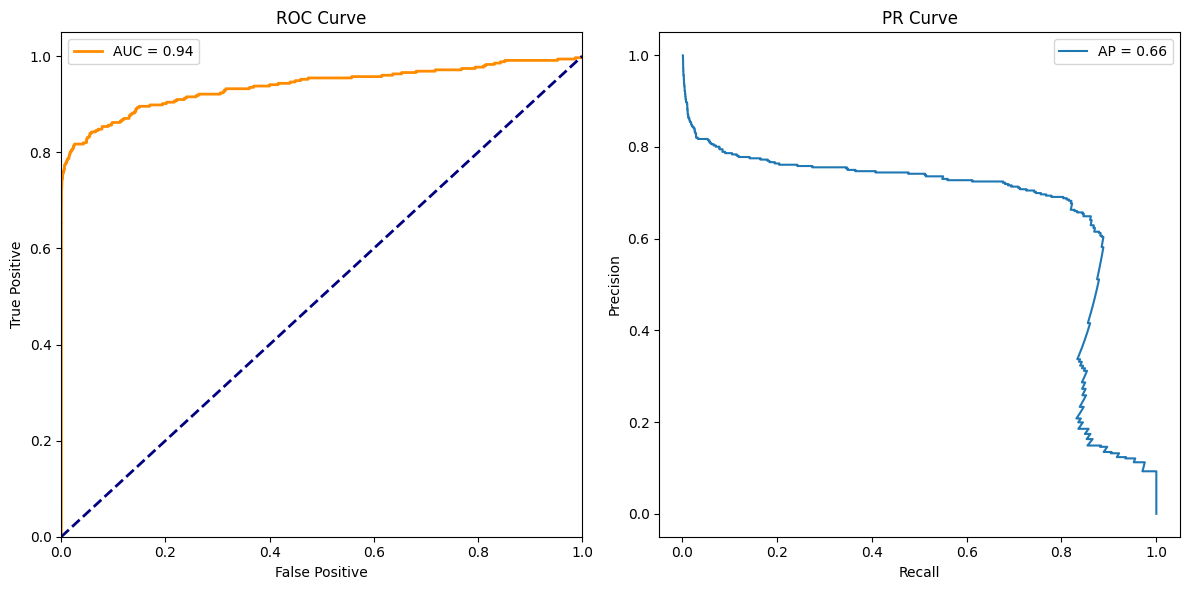

In [6]:
y_scores = model.decision_function(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_train, y_scores)
average_precision = average_precision_score(y_train, y_scores)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(precision, recall, label=f"AP = {average_precision:.2f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Validation data

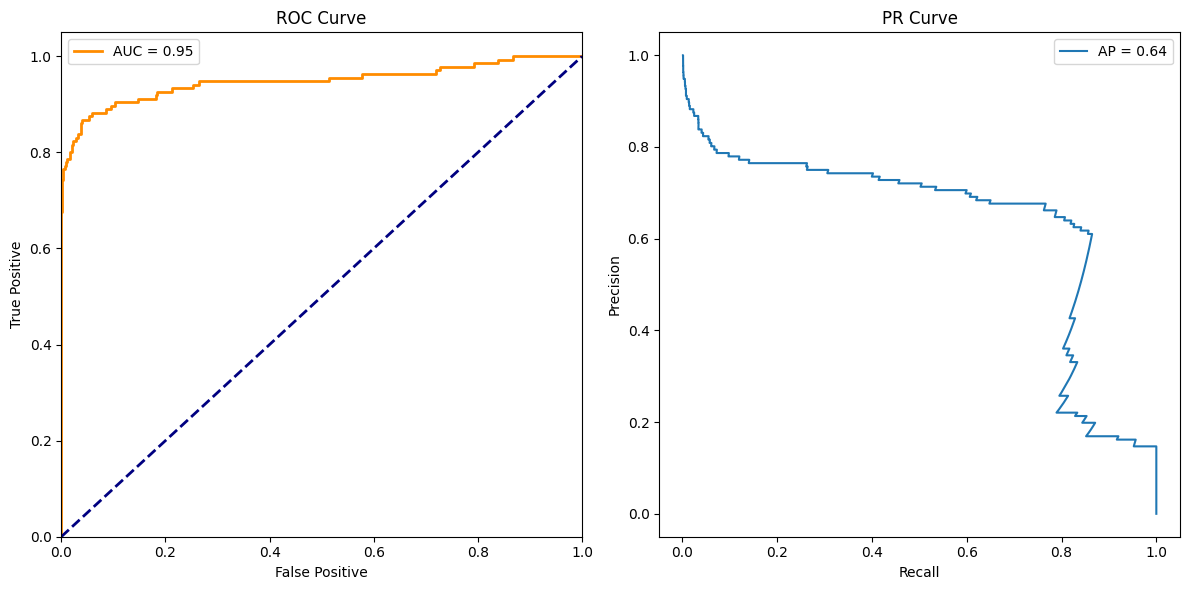

In [7]:
y_scores = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(precision, recall, label=f"AP = {average_precision:.2f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Cross-validation

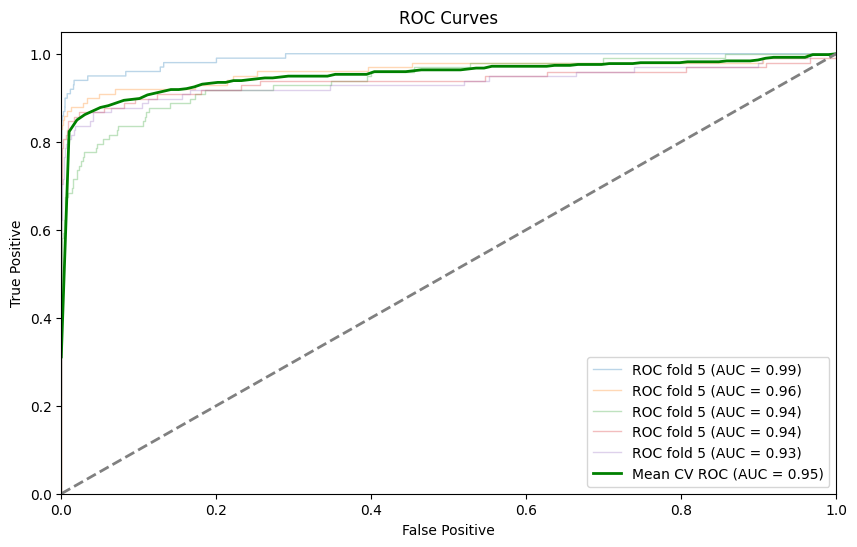

In [8]:
cv = StratifiedKFold(n_splits=5)
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

plt.figure(figsize=(10, 6))



for train, test in cv.split(xs, ys):
    model = LogisticRegression(max_iter=400, n_jobs=8)
    model.fit(xs.iloc[train], ys.iloc[train])
    y_scores_cv = model.predict_proba(xs.iloc[test])[:, 1]
    fpr, tpr, _ = roc_curve(ys.iloc[test], y_scores_cv)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {cv.get_n_splits()} (AUC = {roc_auc:.2f})')

mean_tpr /= cv.get_n_splits()
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='green', lw=2, label=f'Mean CV ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.title('ROC Curves')

plt.show()

In [9]:
from tqdm.notebook import tqdm
vals = np.arange(5000, len(xs), 1000)

roc_aucs_train = ([], [])
roc_aucs_valid = ([], [])
log_loss_valid = ([], [])

for num in tqdm(vals):
    X_train, X_test, y_train, y_test = train_test_split(xs[:num], ys[:num], test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=400, n_jobs=16)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    y_scores = model.decision_function(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_aucs_train[0].append(num)
    roc_aucs_train[1].append(roc_auc)

    y_scores = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    log_loss_val = log_loss(y_test, y_scores)
    roc_aucs_valid[0].append(num)
    log_loss_valid[0].append(num)
    roc_aucs_valid[1].append(roc_auc)
    log_loss_valid[1].append(log_loss_val)



  0%|          | 0/280 [00:00<?, ?it/s]

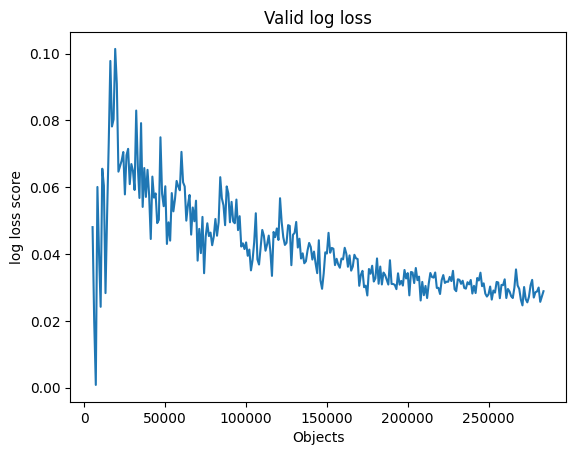

In [ ]:
plt.plot(*log_loss_valid)
plt.title("Valid log loss")
plt.xlabel("Objects")
plt.ylabel("log loss score")
plt.show()

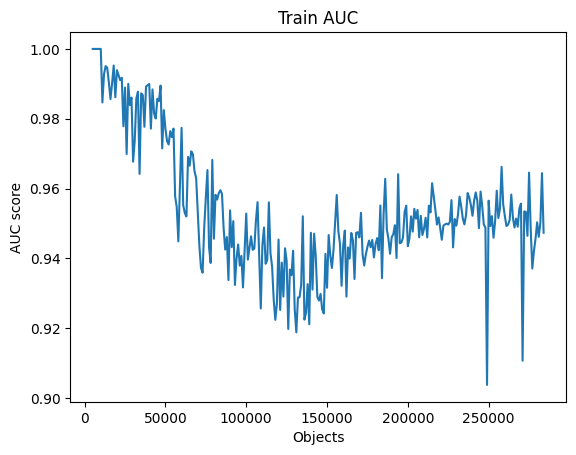

In [ ]:
plt.plot(*roc_aucs_train)
plt.title("Train AUC")
plt.xlabel("Objects")
plt.ylabel("AUC score")
plt.show()

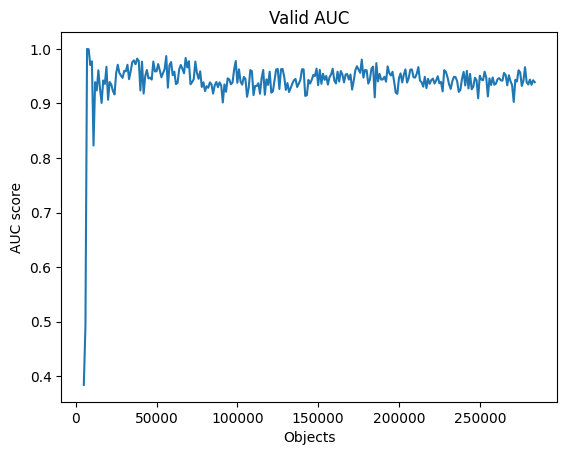

In [ ]:
plt.plot(*roc_aucs_valid)
plt.title("Valid AUC")
plt.xlabel("Objects")
plt.ylabel("AUC score")
plt.show()